In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\Final_ML_Dataset.csv',encoding='cp1252', error_bad_lines=False)
df.head()

,Num_of_Citations,Publication_Name,Publication_Type,FOS,Specific_FOS,Age,Paragraph_Top_Topic,Title_Top_Topic,Paragraph_Num_Of_NLP_Topics,Title_Num_Of_NLP_Topics,Auth_Keywords_Num_Of_NLPTopics,First_Author_ID,First_Author_Affiliation_ID,Last_Author_ID,No_Of_Authors,Last_Author_Affiliation_ID,First_Auth_Aff_Country,Last_Auth_Aff_Country,Paragraph_Top_Topic_prob,Title_Top_Topic_prob
0,2,3411,3,2,31,11,10,14,5,2,1,15020330800,60092867,15765222400,2,60013682,111,103,0.567273,0.651918
1,17,3691,3,2,131,11,36,18,6,1,2,12784607800,60026195,8433926800,6,60026195,128,119,0.731176,0.739983
2,0,840,2,2,131,11,6,3,4,3,0,23093708100,60005472,6506393472,11,60005472,129,120,0.549364,0.426461
3,0,840,2,12,113,11,6,36,4,1,0,14631863500,60003488,55418118500,3,60003488,129,120,0.607424,0.730486
4,0,840,2,12,113,11,6,3,6,2,0,23095356100,60027090,6603405867,11,60027090,129,120,0.501338,0.425626


In [6]:
df_new1=df.copy()
df_new1.loc[df['Num_of_Citations'] < 2, 'Num_of_Citations'] = 1
df_new1.loc[(df['Num_of_Citations']>2) & (df['Num_of_Citations']<=12),'Num_of_Citations']=2
df_new1.loc[df['Num_of_Citations'] >=13, 'Num_of_Citations'] = 3

In [14]:
df_new1.to_csv(r'C:\Users\Mouna\Desktop\Fall2018\DataScience\Project\Excel for publications\Final_ML_Dataset_Group.csv')

In [8]:
# Defining x anf y
y=df_new1.Num_of_Citations
X=df_new1.loc[:, df_new1.columns != 'Num_of_Citations']
# Diving data into training and testing
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)
print(Xtrain.shape, Xtest.shape)

(60364, 19) (15092, 19)


In [18]:
!pip install xgboost

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
from xgboost import XGBClassifier
trained_model = XGBClassifier(n_estimators=5, learning_rate=0.3)
trained_model.fit(Xtrain, ytrain)
predictions = trained_model.predict(Xtest)

In [10]:
 # Test Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print ("Test Accuracy  :: ", accuracy_score(ytest, predictions))
print ("\n Confusion matrix \n", confusion_matrix(ytest, predictions))
print ("\nFeature Importance :: \n", pd.DataFrame(trained_model.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance',ascending=False))
print("\nClassification Report :: \n", classification_report(ytest, predictions))

Test Accuracy  ::  0.625496952028

 Confusion matrix 
 [[5593  449  684]
 [1973 1014 1833]
 [ 276  437 2833]]

Feature Importance :: 
                                 importance
Age                               0.371429
Publication_Name                  0.219048
Publication_Type                  0.219048
Last_Auth_Aff_Country             0.057143
Paragraph_Num_Of_NLP_Topics       0.047619
First_Author_ID                   0.047619
First_Auth_Aff_Country            0.019048
No_Of_Authors                     0.019048
Last_Author_ID                    0.000000
Paragraph_Top_Topic_prob          0.000000
Last_Author_Affiliation_ID        0.000000
Auth_Keywords_Num_Of_NLPTopics    0.000000
First_Author_Affiliation_ID       0.000000
Title_Num_Of_NLP_Topics           0.000000
Title_Top_Topic                   0.000000
Paragraph_Top_Topic               0.000000
Specific_FOS                      0.000000
FOS                               0.000000
Title_Top_Topic_prob              0.000000

Clas

In [2]:
# Defining x anf y
y=df.Num_of_Citations
X=df.loc[:, df.columns != 'Num_of_Citations']
# Diving data into training and testing
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=2,test_size=0.2)

C:\Users\Mouna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from xgboost import XGBRegressor
trained_model_rg = XGBRegressor(n_estimators=5, learning_rate=0.3)
trained_model_rg.fit(Xtrain, ytrain)
predictions_rg = trained_model_rg.predict(Xtest)

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
# root mean square error of the model
print("RMSE is ",sqrt(mean_squared_error(ytest, predictions_rg)))
# r-squared score of the model
print("r-square is ",r2_score(ytest, predictions_rg))

RMSE is  99.61984039654173
r-square is  0.035682938878


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor(n_estimators = 500, random_state = 2)
rf_r.fit(Xtrain, ytrain)
y_pred_reg = rf_r.predict(Xtest)

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
# root mean square error of the model
print("RMSE is ",sqrt(mean_squared_error(ytest, y_pred_reg)))
# r-squared score of the model
print("r-square is ",r2_score(ytest, y_pred_reg))

RMSE is  112.16535767395222
r-square is  -0.222490966102


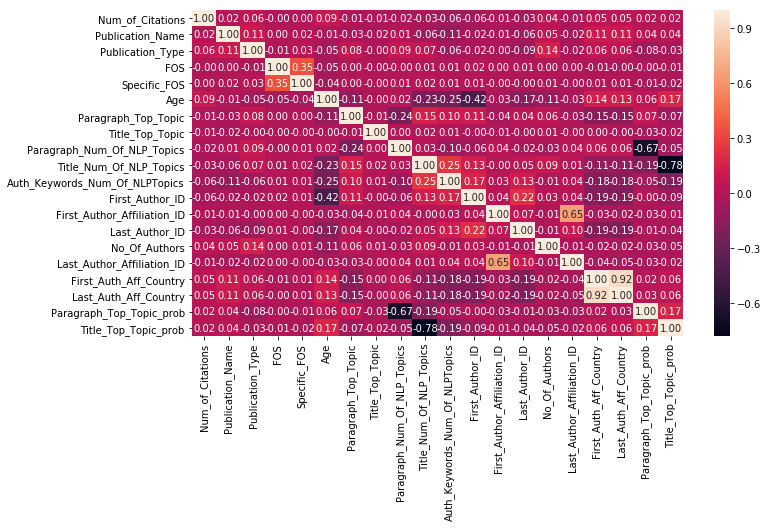

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
corr=df.corr()
fig, ax = plt.subplots(figsize=(11,6)) 
sns.heatmap(corr, annot=True,fmt=".2f")
plt.show()